In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
%matplotlib inline

df = pd.read_csv('C:\\Users\\talib\\ML\\Data Science\\fetal_health.csv')

In [2]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [4]:
df.duplicated().sum()

13

In [5]:
df.drop_duplicates(keep='first', inplace = True)

In [6]:
df.duplicated().sum()

0

In [7]:
X = df.drop(columns = 'fetal_health', axis = 1)
y = df['fetal_health']

In [8]:
y.value_counts()

1.0    1646
2.0     292
3.0     175
Name: fetal_health, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X-Train:', X_train.shape)
print('Y-Train:', y_train.shape)
print('X-Test:', X_test.shape)
print('Y-Test:', y_test.shape)

print('\nY-Train:', y_train.value_counts())
print('\nY-Test:', y_test.value_counts())

X-Train: (1690, 21)
Y-Train: (1690,)
X-Test: (423, 21)
Y-Test: (423,)

Y-Train: 1.0    1305
2.0     238
3.0     147
Name: fetal_health, dtype: int64

Y-Test: 1.0    341
2.0     54
3.0     28
Name: fetal_health, dtype: int64


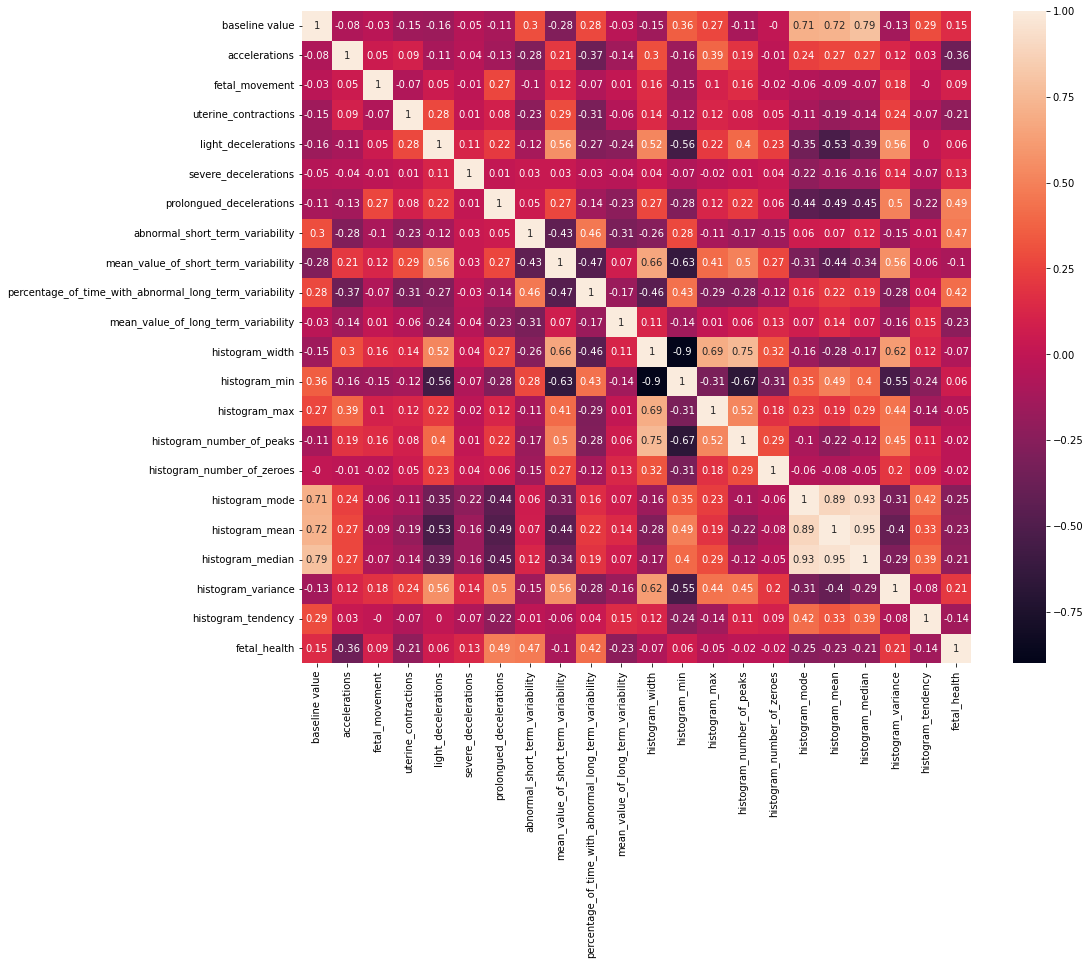

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.corr(),2),annot=True)
plt.show()

# KNN

In [11]:
#STANDARDAISING 
scaler = StandardScaler()
X_train_Scale = scaler.fit_transform(X_train)
X_test_Scale = scaler.transform(X_test)


In [12]:
model_knn = KNeighborsClassifier()

In [13]:
model_knn.fit(X_train_Scale,y_train)

KNeighborsClassifier()

In [14]:
model_knn.score(X_train_Scale,y_train)

0.9337278106508876

# SVM

In [15]:
scaler = StandardScaler()
X_train_Scale = scaler.fit_transform(X_train)
X_test_Scale = scaler.transform(X_test)


In [16]:
# define the model
model_svc = svm.SVC(kernel='linear', C=1.0)

In [17]:
# train the model
model_svc.fit(X_train_Scale, y_train)


SVC(kernel='linear')

In [18]:
model_svc.score(X_train_Scale,y_train)

0.908284023668639

# Random Forest

In [19]:
model_rf =RandomForestClassifier()

In [20]:
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [21]:
#model overfit
model_rf.score(X_train,y_train)

0.9994082840236687

# Grid Search

In [22]:
grid={"n_estimators":[100,200,300],"max_features":[5,6,7,8],"max_depth":[6,7,8], "min_samples_split":[5,10,15,20,30]} 

In [23]:
CV_model=GridSearchCV(estimator=model_rf,cv=5,param_grid=grid)

In [24]:
CV_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 7, 8], 'max_features': [5, 6, 7, 8],
                         'min_samples_split': [5, 10, 15, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [25]:
CV_model.best_estimator_

RandomForestClassifier(max_depth=8, max_features=7, min_samples_split=5,
                       n_estimators=200)

In [26]:
CV_model.score(X_train,y_train)

0.9798816568047337

In [27]:
CV_model.score(X_test,y_test)

0.966903073286052

In [28]:
CV_model.best_params_

{'max_depth': 8,
 'max_features': 7,
 'min_samples_split': 5,
 'n_estimators': 200}

In [29]:
y_pred_train =CV_model.predict(X_train)
confusion_matrix(y_train,y_pred_train)

array([[1302,    3,    0],
       [  25,  213,    0],
       [   2,    4,  141]], dtype=int64)

In [30]:
y_pred_test =CV_model.predict(X_test)
confusion_matrix(y_test,y_pred_test)

array([[336,   5,   0],
       [  9,  45,   0],
       [  0,   0,  28]], dtype=int64)

In [31]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

         1.0       0.98      1.00      0.99      1305
         2.0       0.97      0.89      0.93       238
         3.0       1.00      0.96      0.98       147

    accuracy                           0.98      1690
   macro avg       0.98      0.95      0.97      1690
weighted avg       0.98      0.98      0.98      1690



In [32]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         1.0       0.97      0.99      0.98       341
         2.0       0.90      0.83      0.87        54
         3.0       1.00      1.00      1.00        28

    accuracy                           0.97       423
   macro avg       0.96      0.94      0.95       423
weighted avg       0.97      0.97      0.97       423



# KFold

In [41]:
kfold = KFold(10)
results = cross_val_score(model_rf,X,y,cv=kfold)
print(results)

[0.83962264 0.88207547 0.87735849 0.85781991 0.99526066 1.
 0.89099526 0.92890995 0.85308057 0.80094787]


In [42]:
skfold = StratifiedKFold(n_splits=5)
sk_scores = cross_val_score(model_rf,X,y,cv=skfold)
print(sk_scores)


[0.86524823 0.89125296 0.90543735 0.87203791 0.77488152]
